In this notebook, we are build and train a neural network model for pricing European Basket options using the data generated.

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import time
import sklearn
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout

from keras import regularizers
from keras.callbacks import EarlyStopping

In [67]:
# load the data
df = pd.read_csv('/content/Basket_pricing_data.csv')

In [68]:
df.head()

,Time_to_maturity,Volatility,Rate,Prices,Strikes,Basket_Price
0,0.312940,0.971599,0.055212,103.415142,119.308803,17.322021
1,0.737544,0.873782,0.072920,100.492028,96.329412,32.868675
2,0.403137,0.612165,0.094521,92.229388,118.776753,7.192391
3,0.820078,0.703118,0.055660,91.046860,84.834108,26.838372
4,0.249990,0.231171,0.055516,104.889070,134.312004,0.109719


In [69]:
def split_data(df, label, test_size=0.3):
    """           
    Parameters
    ----------

    data : pd.Dataframe
          The simulated data.
    label : str
          Name of the label column.
    test_size : float
          The proportion of the dataset in the test split.
    
    """
    # split the data into features and labels
    X = df.drop([label], axis=1)
    y = df.Basket_Price

    # split the data to training and testing
    X_train, X_test, y_train, y_test =\
                 train_test_split(X, y, test_size=test_size)

    return X_train, X_test, y_train, y_test

In [70]:
# split the data
X_train, X_test, y_train, y_test = split_data(df, 'Basket_Price', 0.3)

In [71]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7000, 5), (3000, 5), (7000,), (3000,))

In [78]:
# Build the model
model = Sequential()

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(optimizer='adam', loss='mse', metrics=['mse'])


In [79]:
epochs = 100
vs = 0.2 # validation_split
bs = 32 # batch_size
callback = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, y_train, epochs=epochs, validation_split=vs, batch_size=bs, callbacks=callback)

Epoch 1/100
175/175 [==============================] - 1s 3ms/step - loss: 82.9092 - mse: 82.9092 - val_loss: 58.5826 - val_mse: 58.5826
Epoch 2/100
175/175 [==============================] - 0s 2ms/step - loss: 52.5827 - mse: 52.5827 - val_loss: 50.2233 - val_mse: 50.2233
Epoch 3/100
175/175 [==============================] - 0s 3ms/step - loss: 45.7289 - mse: 45.7289 - val_loss: 47.2555 - val_mse: 47.2555
Epoch 4/100
175/175 [==============================] - 0s 2ms/step - loss: 36.3734 - mse: 36.3734 - val_loss: 34.7057 - val_mse: 34.7057
Epoch 5/100
175/175 [==============================] - 0s 2ms/step - loss: 28.4908 - mse: 28.4908 - val_loss: 23.4097 - val_mse: 23.4097
Epoch 6/100
175/175 [==============================] - 0s 3ms/step - loss: 20.2307 - mse: 20.2307 - val_loss: 18.0443 - val_mse: 18.0443
Epoch 7/100
175/175 [==============================] - 0s 3ms/step - loss: 13.7081 - mse: 13.7081 - val_loss: 10.8958 - val_mse: 10.8958
Epoch 8/100
175/175 [====================

In [80]:
results = model.evaluate(X_test, y_test)
print("test loss, test mae:", results)

94/94 [==============================] - 0s 1ms/step - loss: 1.5347 - mse: 1.5347
test loss, test mae: [1.534704566001892, 1.534704566001892]


In [81]:
start = time.time()
pred = model.predict(X_test)
end = time.time()
print(f"Runtime of the model on test set is {end - start}")

Runtime of the model on test set is 0.23053789138793945


Text(0.5, 1.0, 'Basket_prices')

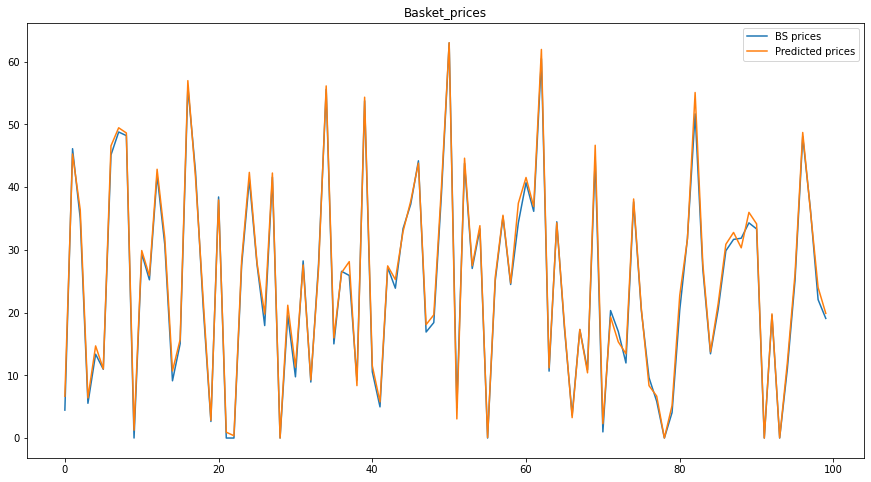

In [101]:
n = 100
plt.figure(figsize=(15,8))
plt.plot(range(n), pred.reshape((y_test.shape[0],))[:n], label='BS prices')
plt.plot(range(n),y_test[:n], label='Predicted prices')
plt.legend()
plt.title("Basket_prices")

In [96]:
# save the model to disk
filename = 'final_model.sav'
pickle.dump(model, open(filename, 'wb'))
 

INFO:tensorflow:Assets written to: ram://f0a99ea3-1bd7-4e11-bcd8-430376650589/assets


In [97]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))